In [3]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage as ndi 
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

In [6]:
image_BGR = cv2.imread("ara2012_tray01_rgb.png")
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
image = image_BGR

NameError: name 'meanBlur' is not defined

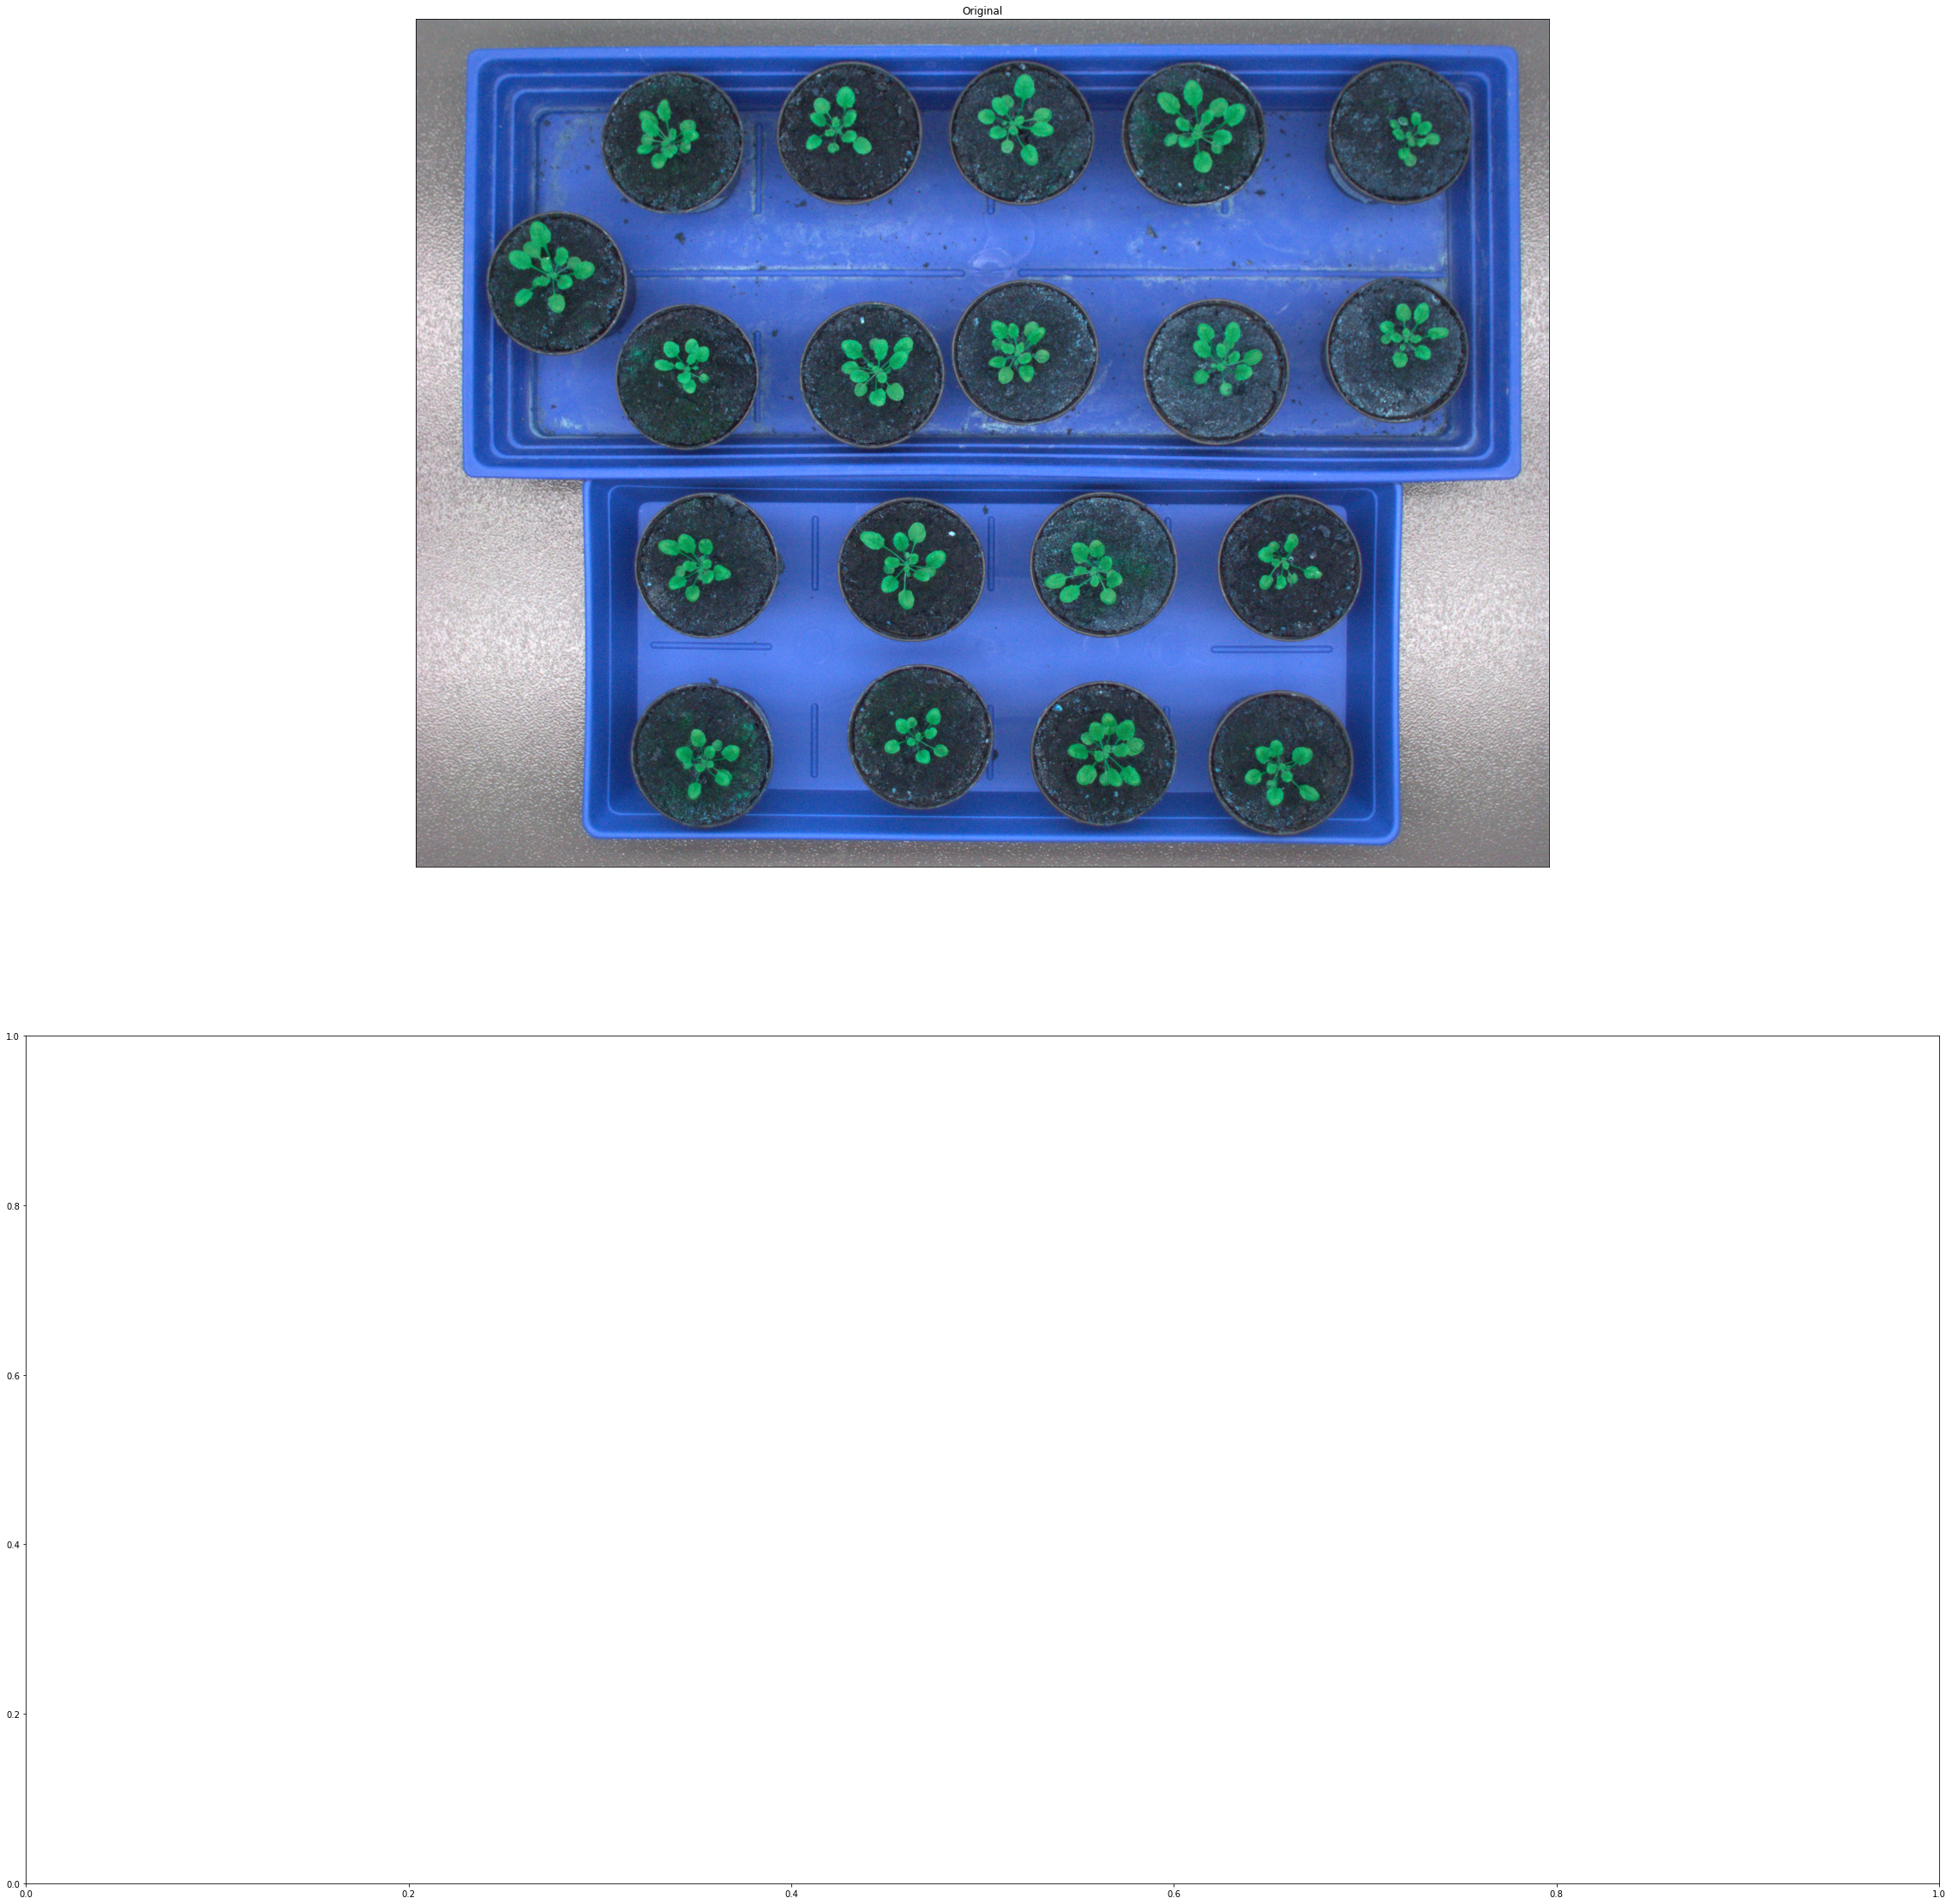

In [7]:
fig = plt.gcf()
fig.set_size_inches(40,40)
plt.subplot(211),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(meanBlur(image)),plt.title('Mean filter 7*7')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def green(image):
    ## convert to hsv
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    ## mask of green (36,25,25) ~ (86, 255,255)
    # mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
    mask = cv2.inRange(hsv, (40, 30, 30), (75, 255,255))

    ## slice the green
    imask = mask>0
    green = np.zeros_like(image, np.uint8)
    green[imask] = image[imask]

    ## save 
    # cv2.imwrite("green.png", green)


    fig = plt.gcf()
    fig.set_size_inches(40,40)
    plt.subplot(211),plt.imshow(image),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(212),plt.imshow(green),plt.title('green')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    return green

In [ ]:
green = green(image)

In [ ]:
def meanBlur(img):
    MeanBlur = cv2.blur(img, (7, 7))
    M2 = cv2.subtract(img, MeanBlur)
    meanBlur_sharpen = cv2.addWeighted(img, 1, M2, 1.5, 0)
    return meanBlur_sharpen


def medianBlur(img):
    medianBlur = cv2.medianBlur(img, 7)
    M3 = cv2.subtract(img, medianBlur)
    medianBlur_sharpen = cv2.addWeighted(img, 1, M3, 3, 0)
    return medianBlur_sharpen


def Gaussian(img):
    Gaussian = cv2.GaussianBlur(img, (15, 15), 15)
    M = cv2.subtract(img, Gaussian)
    Gaussian_sharpen = cv2.addWeighted(img, 1, M, 2, 0)
    return Gaussian_sharpen

In [ ]:
Blur = cv2.blur(green, (3, 3))
fig = plt.gcf()
fig.set_size_inches(40,40)
plt.subplot(211),plt.imshow(green),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(Blur),plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.show()